In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as wb

In [163]:
#We will analyze the performance of the stock index of some G7 countries in the pandemic scenario
#EUA-S&P 500 ; Canada-TSX-300; Germany-DAX-30
#France-CAC-40.
#The order is respective as shown above.
indicators=['^GSPC','^GSPTSE','^GDAXI','^FCHI']
indexes=pd.DataFrame()
for c in indicators:
    indexes[c]=wb.DataReader(c,data_source='yahoo',start='01-01-2020',end='08-22-2022')['Adj Close']

In [164]:
#renaming column names
#names=['S&P 500','TSX-300','DAX-30','CAC-40']
indexes.rename(columns={'^GSPC':'S&P 500','^GSPTSE':'TSX-300',
'^GDAXI':'DAX-30','^FCHI':'CAC-40'},inplace=True)
indexes.tail()

,S&P 500,TSX-300,DAX-30,CAC-40
Date,,,,
2022-08-16,4305.200195,20270.000000,13910.120117,6592.580078
2022-08-17,4274.040039,20181.400391,13626.709961,6528.319824
2022-08-18,4283.740234,20265.400391,13697.410156,6557.399902
2022-08-19,4228.479980,20111.400391,13544.519531,6495.830078
2022-08-22,4137.990234,19974.900391,13230.570312,6378.740234


In [165]:
#setting up the indexes
sp500=indexes['S&P 500']
tsx300=indexes['TSX-300']
dax30=indexes['DAX-30']
cac40=indexes['CAC-40']

In [166]:
#cumulative return
sp500=np.cumprod(sp500.pct_change()+1)-1
tsx300=np.cumprod(tsx300.pct_change()+1)-1
dax30=np.cumprod(dax30.pct_change()+1)-1
cac40=np.cumprod(cac40.pct_change()+1)-1

In [167]:
#the profit is determined by: sp500[-1]*100,tsx300[-1]*100 and so on.
columns=['S&P 500','TSX-300','DAX-30','CAC-40']
profit=[round(sp500[-1]*100,2),round(tsx300[-1]*100,2),round(dax30[-1]*100,2),round(cac40[-1]*100,2)]

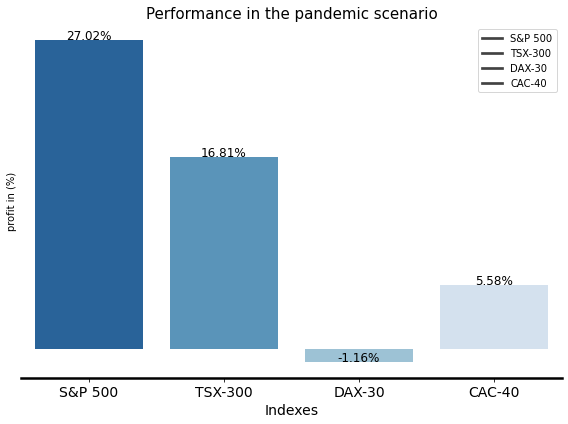

In [168]:
#figure, axes, setting the size
fig, ax = plt.subplots(figsize=(8,6))
#Bar plot
plot=sns.barplot(x=columns, y=profit, palette='Blues_r',ci=False)
#add title
ax.set_title("Performance in the pandemic scenario", fontdict={'fontsize':15})
#add legend 
plot.legend(labels=columns,loc='upper right')
#setting the name and size of xlabel
ax.set_xlabel('Indexes', fontdict={'fontsize':14})
#setting the name of ylabel
ax.set_ylabel('profit in (%)')
#setting the size of ticks
ax.tick_params(labelsize=14)
#increasing the thickness
ax.spines['bottom'].set_linewidth(2.5)
#removing axes
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
#numbers
for i in plot.patches:
   plot.annotate(f'{i.get_height()}%',(i.get_x()+i.get_width()/2,i.get_height()),
   ha='center',va='baseline',fontsize=12,
   color='black',xytext=(0,1),
   textcoords='offset points')
#removinfg ticks
ax.tick_params(axis='y', labelleft=False, left=None)                  
#space optimize
fig.tight_layout();

In [169]:
#correlation
indexes.corr().style.background_gradient(cmap='Blues')

,S&P 500,TSX-300,DAX-30,CAC-40
S&P 500,1.000000,0.965516,0.920165,0.938532
TSX-300,0.965516,1.000000,0.878778,0.958793
DAX-30,0.920165,0.878778,1.000000,0.907344
CAC-40,0.938532,0.958793,0.907344,1.000000


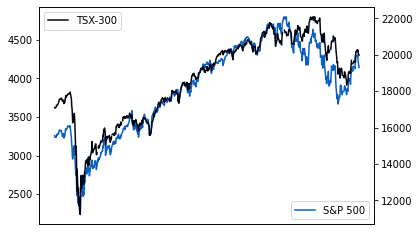

In [170]:
fig,ax1=plt.subplots()
ax1.plot(indexes['S&P 500'],color='#0a5fc0',label='S&P 500')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels,loc='lower right')
ax2=ax1.twinx()
ax2.plot(indexes['TSX-300'],color='#010615',label='TSX-300')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)
plt.xticks([])
plt.show()

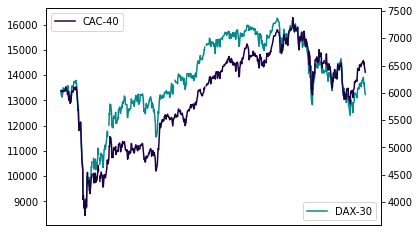

In [171]:
fig,ax1=plt.subplots()
ax1.plot(indexes['DAX-30'],color='#07888a',label='DAX-30')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels,loc='lower right')
ax2=ax1.twinx()
ax2.plot(indexes['CAC-40'],color='#1c0144',label='CAC-40')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc='upper left')
plt.xticks([])
plt.show()